# QA for batch mock analysis: picca outputs (multi-mock)

This is a quality assessment notebook to make simple plots when analysing a batch of mocks. This notebook focuses on assessing the outputs from picca when analysing several mocks. Comparisons fall into several key flavours:
 - Different mocks from one initial "cosmic realisation". I.e. looking at the differences between the different measurements made when including different systematic effects
 - Mocks of the same type from many "cosmic realisations". I.e. looking at the scatter between results due to cosmic variance for a given set of systematic effects.

In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import fitsio
import healpy as hp
import os
import glob

from lyacolore import utils
from lyacolore.plot_functions import get_fit_from_result

In [48]:
# Set up colours
mycolours = {'C0': '#F5793A', 'C1': '#A95AA1', 'C2': '#85C0F9', 'C3': '#0F2080'}

# Plot settings
fontsize = 18
plt.rc('font', size=fontsize)

In [49]:
picca_dir = '/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/'

## Many mocks, single realisation

In [50]:
lyalya_lyalya_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalya_lyalya/result_lyalya_lyalya_rmin40.0_rmax160.0_afree.h5'
lyalya_lyalyb_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalya_lyalyb/result_lyalya_lyalyb_rmin40.0_rmax160.0_afree.h5'
lyalya_lyalya__lyalya_lyalyb_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalya_lyalya__lyalya_lyalyb/result_lyalya_lyalya__lyalya_lyalyb_rmin40.0_rmax160.0_afree.h5'

lyalya_qso_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalya_qso/result_lyalya_qso_rmin40.0_rmax160.0_afree.h5'
lyalyb_qso_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalyb_qso/result_lyalyb_qso_rmin40.0_rmax160.0_afree.h5'
lyalya_qso__lyalyb_qso_res = picca_dir + 'v9.0.0/desi-raw/fits/lyalya_qso__lyalyb_qso/result_lyalya_qso__lyalyb_qso_rmin40.0_rmax160.0_afree.h5'

In [51]:
results = {}

results['lyalya_lyalya']  = get_fit_from_result(os.path.dirname(lyalya_lyalya_res)+'/',os.path.basename(lyalya_lyalya_res),'lyalya_lyalya','cf')
results['lyalya_lyalyb']  = get_fit_from_result(os.path.dirname(lyalya_lyalyb_res)+'/',os.path.basename(lyalya_lyalyb_res),'lyalya_lyalyb','cf')
results['full_auto']  = get_fit_from_result(os.path.dirname(lyalya_lyalya__lyalya_lyalyb_res)+'/',os.path.basename(lyalya_lyalya__lyalya_lyalyb_res),'lyalya_lyalya','cf')

results['lyalya_qso']  = get_fit_from_result(os.path.dirname(lyalya_qso_res)+'/',os.path.basename(lyalya_qso_res),'lyalya_qso','xcf')
results['lyalyb_qso']  = get_fit_from_result(os.path.dirname(lyalyb_qso_res)+'/',os.path.basename(lyalyb_qso_res),'lyalyb_qso','xcf')
results['full_cross']  = get_fit_from_result(os.path.dirname(lyalya_qso__lyalyb_qso_res)+'/',os.path.basename(lyalya_qso__lyalyb_qso_res),'lyalya_qso','xcf')

chi2: 1129.5/(1177-6)
chi2: 1147.2/(1177-6)
chi2: 2278.8/(2354-6)
chi2: 2480.1/(2354-6)
chi2: 2594.8/(2354-6)
chi2: 5089.7/(4708-6)


In [52]:
for i,k in enumerate(results['lyalya_lyalya'].keys()):
    try:
        print(k)
        print(' -> lyalya_lyalya: {:1.5f} +/- {:1.5f}'.format(results['lyalya_lyalya'][k]['value'],results['lyalya_lyalya'][k]['error']))
        print(' -> lyalya_lyalyb: {:1.5f} +/- {:1.5f}'.format(results['lyalya_lyalyb'][k]['value'],results['lyalya_lyalyb'][k]['error']))
        print(' -> full_auto:     {:1.5f} +/- {:1.5f}'.format(results['full_auto'][k]['value'],results['full_auto'][k]['error']))
    except:
        print(' -> lyalya_lyalya:',results['lyalya_lyalya'][k]['value'])
        print(' -> lyalya_lyalyb: {:1.5f}'.format(results['lyalya_lyalyb'][k]['value']))
        print(' -> full_auto:    ',results['full_auto'][k]['value'])
        pass

alpha_lya
 -> lyalya_lyalya: 2.90000 +/- 0.00000
 -> lyalya_lyalyb: 2.90000 +/- 0.00000
 -> full_auto:     2.90000 +/- 0.00000
ap
 -> lyalya_lyalya: 1.00845 +/- 0.00924
 -> lyalya_lyalyb: 1.01225 +/- 0.01139
 -> full_auto:     1.00981 +/- 0.00717
at
 -> lyalya_lyalya: 1.00325 +/- 0.01347
 -> lyalya_lyalyb: 1.00463 +/- 0.01246
 -> full_auto:     1.00426 +/- 0.00936
bao_amp
 -> lyalya_lyalya: 1.00000 +/- 0.00000
 -> lyalya_lyalyb: 1.00000 +/- 0.00000
 -> full_auto:     1.00000 +/- 0.00000
beta_lya
 -> lyalya_lyalya: 1.64883 +/- 0.05377
 -> lyalya_lyalyb: 1.61900 +/- 0.06206
 -> full_auto:     1.63732 +/- 0.04084
bias_eta_lya
 -> lyalya_lyalya: -0.20455 +/- 0.00272
 -> lyalya_lyalyb: -0.19091 +/- 0.00301
 -> full_auto:     -0.19953 +/- 0.00204
cov[ap, ap]


IndexError: invalid index to scalar variable.

In [53]:
for i,k in enumerate(results['lyalya_lyalya'].keys()):
    try:
        print(k)
        print(' -> lyalya_qso: {:1.5f} +/- {:1.5f}'.format(results['lyalya_qso'][k]['value'],results['lyalya_qso'][k]['error']))
        print(' -> lyalyb_qso: {:1.5f} +/- {:1.5f}'.format(results['lyalyb_qso'][k]['value'],results['lyalyb_qso'][k]['error']))
        print(' -> full_cross: {:1.5f} +/- {:1.5f}'.format(results['full_cross'][k]['value'],results['full_cross'][k]['error']))
    except:
        print(' -> lyalya_qso:',results['lyalya_lyalya'][k]['value'])
        print(' -> lyalyb_qso: {:1.5f}'.format(results['lyalya_lyalyb'][k]['value']))
        print(' -> full_cross: ',results['full_auto'][k]['value'])
        pass

alpha_lya
 -> lyalya_qso: 2.90000 +/- 0.00000
 -> lyalyb_qso: 2.90000 +/- 0.00000
 -> full_cross: 2.90000 +/- 0.00000
ap
 -> lyalya_qso: 0.99074 +/- 0.00936
 -> lyalyb_qso: 0.97064 +/- 0.01902
 -> full_cross: 0.98790 +/- 0.00837
at
 -> lyalya_qso: 1.00561 +/- 0.00934
 -> lyalyb_qso: 1.02946 +/- 0.01657
 -> full_cross: 1.01149 +/- 0.00797
bao_amp
 -> lyalya_qso: 1.00000 +/- 0.00000
 -> lyalyb_qso: 1.00000 +/- 0.00000
 -> full_cross: 1.00000 +/- 0.00000
beta_lya
 -> lyalya_qso: 1.66469 +/- 0.07576
 -> lyalyb_qso: 1.97085 +/- 0.16825
 -> full_cross: 1.72091 +/- 0.06760
bias_eta_lya
 -> lyalya_qso: -0.20211 +/- 0.00406
 -> lyalyb_qso: -0.21005 +/- 0.00771
 -> full_cross: -0.20398 +/- 0.00352
cov[ap, ap]


IndexError: invalid index to scalar variable.

In [107]:
mocktypes = ['desi-raw', 'desi-1.0-1000', 'desi-1.0-4']
fitname = 'lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso'
corrtype = 'cf'
alphas_fix = 'free'

In [108]:
fitloc = '{}/fits/{}/result_*_a{}.h5'
realisation_dir = 'v9.0.0'

In [109]:
mock_results = [os.path.join(picca_dir,realisation_dir,fitloc.format(m,fitname,alphas_fix)) for m in mocktypes]

In [110]:
results = {}

In [111]:
for i,m in enumerate(mocktypes):
    f = glob.glob(mock_results[i])
    print(mock_results[i])
    assert len(f)==1
    f = f[0]
    loc = os.path.dirname(f)
    filename = os.path.basename(f)
    print(loc.split('/')[-4:])
    results[m] = get_fit_from_result(loc+'/',filename,'lyalya_lyalya',corrtype)

/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-raw/fits/lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso/result_*_afree.h5
['v9.0.0', 'desi-raw', 'fits', 'lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso']
chi2: 7383.0/(7062-7)
/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-1000/fits/lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso/result_*_afree.h5
['v9.0.0', 'desi-1.0-1000', 'fits', 'lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso']
chi2: 7176.0/(7062-7)
/global/cfs/projectdirs/desi/mocks/lya_forest/picca/london/v9.0/v9.0.0/desi-1.0-4/fits/lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso/result_*_afree.h5
['v9.0.0', 'desi-1.0-4', 'fits', 'lyalya_lyalya__lyalya_lyalyb__lyalya_qso__lyalyb_qso']
chi2: 7137.6/(7062-7)


In [112]:
keys = mocktypes
xvals = np.arange(0,len(mocktypes))

In [113]:
ap = np.array([results[k]['ap']['value'] for k in keys])
ap_err = np.array([results[k]['ap']['error'] for k in keys])

at = np.array([results[k]['at']['value'] for k in keys])
at_err = np.array([results[k]['at']['error'] for k in keys])

bias_eta_lya = np.array([results[k]['bias_eta_lya']['value'] for k in keys])
bias_eta_lya_err = np.array([results[k]['bias_eta_lya']['error'] for k in keys])

beta_lya = np.array([results[k]['beta_lya']['value'] for k in keys])
beta_lya_err = np.array([results[k]['beta_lya']['error'] for k in keys])

growth_rate = np.array([results[k]['growth_rate']['value'] for k in keys])

bias_delta_lya = np.array([growth_rate[i]*bias_eta_lya[i]/beta_lya[i] for i,k in enumerate(keys)])
bias_delta_lya_err = bias_delta_lya * np.sqrt((bias_eta_lya_err/bias_eta_lya)**2 + (beta_lya_err/beta_lya)**2)

chi2 = [results[k]['fval'] for k in keys]
ndof = [(results[k]['ndata'] - results[k]['npar']) for k in keys]
assert (np.array(ndof)==ndof[0]).all()

['desi-raw', 'desi-1.0-1000', 'desi-1.0-4']
[0.00533785 0.00592111 0.00758934]
[0.00617644 0.00706051 0.00908922]


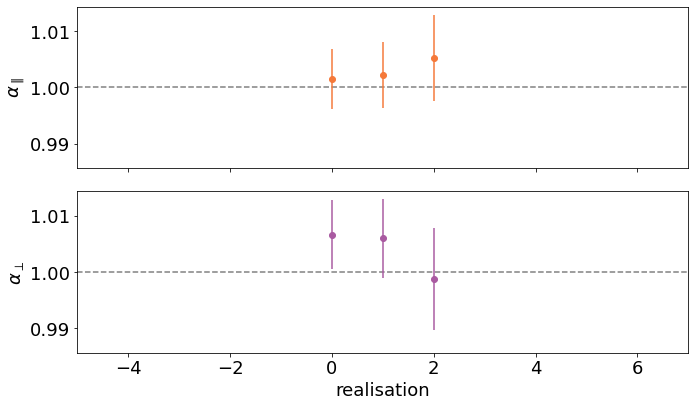

In [114]:
fig, axs = plt.subplots(2,1,figsize=(10,6),squeeze=False,sharex=True,sharey=True)

axs[0,0].errorbar(xvals[:],ap[:],ls='',yerr=ap_err[:],marker='o',color=mycolours['C0'])
axs[0,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)
axs[0,0].set_ylabel(r'$\alpha_\parallel$')

axs[1,0].errorbar(xvals[:],at[:],ls='',yerr=at_err[:],marker='o',color=mycolours['C1'])
axs[1,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)
axs[1,0].set_ylabel(r'$\alpha_\perp$')

dev = np.max((1-np.min((abs(ap-ap_err),abs(at-at_err))), np.max((abs(ap+ap_err),abs(at+at_err)))-1))
axs[0,0].set_ylim(1.-1.1*dev,1.+1.1*dev)
axs[-1,0].set_xlabel('realisation')

axs[0,0].set_xlim(-5,7)
plt.tight_layout()

print(keys)
print(ap_err)
print(at_err)

## One mock type, many realisations

Stack and scatter between realisations

In [18]:
mocktype = 'desi-1.0-1000'
fitname = 'lyalya_qso__lyalyb_qso'
corrtype = 'xcf'
fix_alphas = 'free'

In [19]:
realisations = np.arange(0,10)
fitloc = '{}/fits/{}/result_*_a{}.h5'
realisation_dir = 'v9.0.{}'
stack_dir = 'stack_0_to_9'

Plot stack over all realisations

Plot scatter in BAO parameter results

In [20]:
stack_results = [os.path.join(picca_dir,stack_dir,fitloc.format(mocktype,fitname,fix_alphas))]
realisation_results = [os.path.join(picca_dir,realisation_dir.format(r),fitloc.format(mocktype,fitname,fix_alphas)) for r in realisations]

In [21]:
results = {}

In [24]:
stack = os.path.join(stack_results[0])
f = glob.glob(stack)
assert len(f)==1
f = f[0]
loc = os.path.dirname(f)
filename = os.path.basename(f)
results['stack'] = get_fit_from_result(loc+'/',filename,fitname.split('__')[0],corrtype)

chi2: 5235.4/(4708-6)


In [25]:
for i,r in enumerate(realisations):
    f = glob.glob(realisation_results[i])
    assert len(f)==1
    f = f[0]
    loc = os.path.dirname(f)
    filename = os.path.basename(f)
    results[r] = get_fit_from_result(loc+'/',filename,fitname.split('__')[0],corrtype)

chi2: 4959.3/(4708-6)
chi2: 4883.7/(4708-6)
chi2: 4842.3/(4708-6)
chi2: 4756.7/(4708-6)
chi2: 4751.5/(4708-6)
chi2: 4685.5/(4708-6)
chi2: 4847.8/(4708-6)
chi2: 4727.0/(4708-6)
chi2: 4871.0/(4708-6)
chi2: 4746.0/(4708-6)


In [26]:
keys = ['stack'] + list(realisations)
xvals = [-1] + list(realisations)

In [27]:
keys

['stack', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
ap = np.array([results[k]['ap']['value'] for k in keys])
ap_err = np.array([results[k]['ap']['error'] for k in keys])

at = np.array([results[k]['at']['value'] for k in keys])
at_err = np.array([results[k]['at']['error'] for k in keys])

bias_eta_lya = np.array([results[k]['bias_eta_lya']['value'] for k in keys])
bias_eta_lya_err = np.array([results[k]['bias_eta_lya']['error'] for k in keys])

beta_lya = np.array([results[k]['beta_lya']['value'] for k in keys])
beta_lya_err = np.array([results[k]['beta_lya']['error'] for k in keys])

growth_rate = np.array([results[k]['growth_rate']['value'] for k in keys])

bias_delta_lya = np.array([growth_rate[i]*bias_eta_lya[i]/beta_lya[i] for i,k in enumerate(keys)])
bias_delta_lya_err = bias_delta_lya * np.sqrt((bias_eta_lya_err/bias_eta_lya)**2 + (beta_lya_err/beta_lya)**2)

chi2 = [results[k]['fval'] for k in keys]
ndof = [(results[k]['ndata'] - results[k]['npar']) for k in keys]
assert (np.array(ndof)==ndof[0]).all()

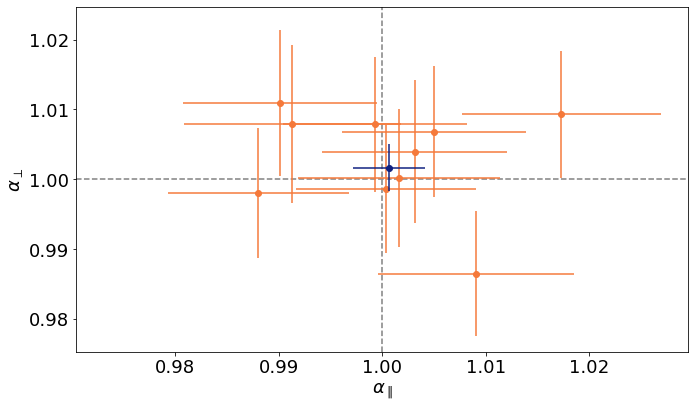

In [29]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.errorbar(ap[1:],at[1:],xerr=ap_err[1:],yerr=at_err[1:],ls='',marker='o',color=mycolours['C0'])
ax.errorbar(ap[0],at[0],xerr=ap_err[0],yerr=at_err[0],ls='',marker='o',color=mycolours['C3'],zorder=10)
ax.axhline(y=1.0,ls='--',c='grey',zorder=-10)
ax.axvline(x=1.0,ls='--',c='grey',zorder=-10)

ax.set_xlabel(r'$\alpha_\parallel$')
ax.set_ylabel(r'$\alpha_\perp$')

dev_at = np.max((abs(1-np.min(at-at_err)), abs(np.max(at+at_err)-1)))
dev_ap = np.max((abs(1-np.min(ap-ap_err)), abs(np.max(ap+ap_err)-1)))
ax.set_ylim(1.-1.1*dev_at,1.+1.1*dev_at)
ax.set_xlim(1.-1.1*dev_ap,1.+1.1*dev_ap)
plt.tight_layout()
plt.savefig('plots/ap_at_scatter_{}_{}.pdf'.format(mocktype,fitname))

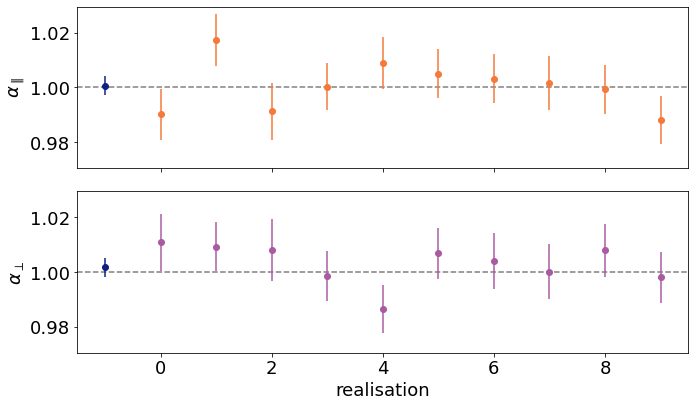

In [30]:
fig, axs = plt.subplots(2,1,figsize=(10,6),squeeze=False,sharex=True,sharey=True)

axs[0,0].errorbar(xvals[1:],ap[1:],ls='',yerr=ap_err[1:],marker='o',color=mycolours['C0'])
axs[0,0].errorbar(xvals[0],ap[0],ls='',yerr=ap_err[0],marker='o',color=mycolours['C3'])
axs[0,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)
axs[0,0].set_ylabel(r'$\alpha_\parallel$')

axs[1,0].errorbar(xvals[1:],at[1:],ls='',yerr=at_err[1:],marker='o',color=mycolours['C1'])
axs[1,0].errorbar(xvals[0],at[0],ls='',yerr=at_err[0],marker='o',color=mycolours['C3'])
axs[1,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)
axs[1,0].set_ylabel(r'$\alpha_\perp$')

dev = np.max((1-np.min((abs(ap-ap_err),abs(at-at_err))), np.max((abs(ap+ap_err),abs(at+at_err)))-1))
axs[0,0].set_ylim(1.-1.1*dev,1.+1.1*dev)
axs[-1,0].set_xlabel('realisation')

plt.tight_layout()
plt.savefig('plots/ap_at_realisations_2panel_{}_{}.pdf'.format(mocktype,fitname))

In [31]:
"""fig, axs = plt.subplots(1,1,figsize=(10,5),squeeze=False,sharex=True,sharey=True)

axs[0,0].errorbar(realisations-0.05,ap,ls='',yerr=ap_err,marker='o',color=mycolours['C0'],label=r'$\alpha_\parallel$')
axs[0,0].errorbar(realisations+0.05,at,ls='',yerr=at_err,marker='o',color=mycolours['C1'],label=r'$\alpha_\perp$')
axs[0,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)

dev = np.max((1-np.min((abs(ap-ap_err),abs(at-at_err))), np.max((abs(ap+ap_err),abs(at+at_err)))-1))
axs[0,0].set_ylim(1.-1.1*dev,1.+1.1*dev)
axs[-1,0].set_xlabel('realisation number')
axs[0,0].legend(ncol=2,loc=3)

plt.tight_layout()
plt.savefig('ap_at_realisations_1panel_{}_{}.pdf'.format(mocktype,fitname))"""

"fig, axs = plt.subplots(1,1,figsize=(10,5),squeeze=False,sharex=True,sharey=True)\n\naxs[0,0].errorbar(realisations-0.05,ap,ls='',yerr=ap_err,marker='o',color=mycolours['C0'],label=r'$\x07lpha_\\parallel$')\naxs[0,0].errorbar(realisations+0.05,at,ls='',yerr=at_err,marker='o',color=mycolours['C1'],label=r'$\x07lpha_\\perp$')\naxs[0,0].axhline(y=1.0,color='grey',ls='--',zorder=-10)\n\ndev = np.max((1-np.min((abs(ap-ap_err),abs(at-at_err))), np.max((abs(ap+ap_err),abs(at+at_err)))-1))\naxs[0,0].set_ylim(1.-1.1*dev,1.+1.1*dev)\naxs[-1,0].set_xlabel('realisation number')\naxs[0,0].legend(ncol=2,loc=3)\n\nplt.tight_layout()\nplt.savefig('ap_at_realisations_1panel_{}_{}.pdf'.format(mocktype,fitname))"

In [32]:
data_bias = {
    'DR12': {'bias_eta_lya':       -0.206,
             'bias_eta_lya_err':    0.012,
             'beta_lya':            1.650,
             'beta_lya_err':        0.081,
             'bias_delta_lya':     -0.121,
             'bias_delta_lya_err':  0.004,
             'ls':                  '--',
             'zeff':                2.3,
            },
    'DR16': {'bias_eta_lya':       -0.2014,
             'bias_eta_lya_err':    0.0032,
             'beta_lya':            1.669,
             'beta_lya_err':        0.071,
             'bias_delta_lya':      0.9704*-0.2014/1.669,
             'bias_delta_lya_err':  0.,
             'ls':                  ':',
             'zeff':                2.3,
            },
}

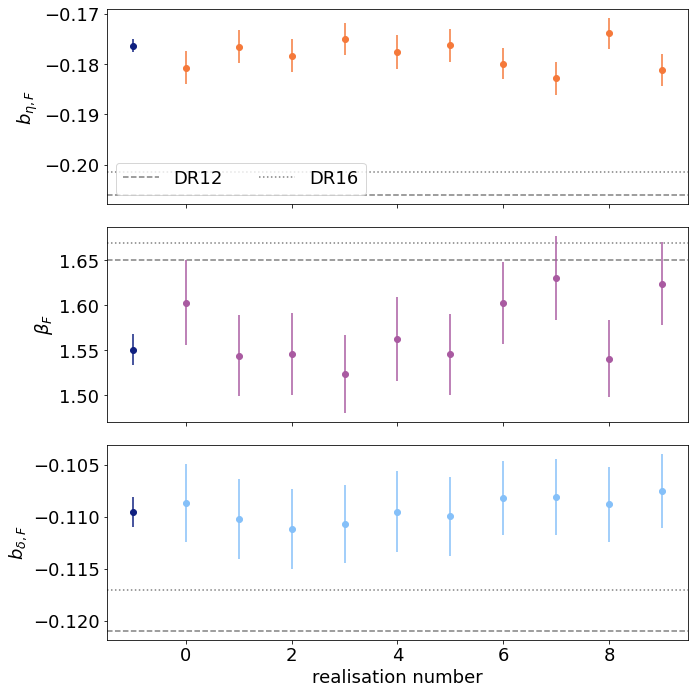

In [33]:
fig, axs = plt.subplots(3,1,figsize=(10,10),squeeze=False,sharex=True)
data_versions = ['DR12','DR16']

axs[0,0].errorbar(xvals[1:],bias_eta_lya[1:],ls='',yerr=bias_eta_lya_err[1:],marker='o',color=mycolours['C0'])
axs[0,0].errorbar(xvals[0],bias_eta_lya[0],ls='',yerr=bias_eta_lya_err[0],marker='o',color=mycolours['C3'])
axs[0,0].set_ylabel(r'$b_{\eta,F}$')

axs[1,0].errorbar(xvals[1:],beta_lya[1:],ls='',yerr=beta_lya_err[1:],marker='o',color=mycolours['C1'])
axs[1,0].errorbar(xvals[0],beta_lya[0],ls='',yerr=beta_lya_err[0],marker='o',color=mycolours['C3'])
axs[1,0].set_ylabel(r'$\beta_F$')

axs[2,0].errorbar(xvals[1:],bias_delta_lya[1:],ls='',yerr=bias_delta_lya_err[1:],marker='o',color=mycolours['C2'])
axs[2,0].errorbar(xvals[0],bias_delta_lya[0],ls='',yerr=bias_delta_lya_err[0],marker='o',color=mycolours['C3'])
axs[2,0].set_ylabel(r'$b_{\delta,F}$')

#dev = np.max((1-np.min((abs(ap-ap_err),abs(at-at_err))), np.max((abs(ap+ap_err),abs(at+at_err)))-1))
#axs[0,0].set_ylim(1.-1.1*dev,1.+1.1*dev)

if len(data_versions)>0:
    for dv in data_versions:
        axs[0,0].axhline(y=data_bias[dv]['bias_eta_lya'],c='grey',ls=data_bias[dv]['ls'],zorder=-10,label=dv)
        axs[1,0].axhline(y=data_bias[dv]['beta_lya'],c='grey',ls=data_bias[dv]['ls'],zorder=-10)
        axs[2,0].axhline(y=data_bias[dv]['bias_delta_lya'],c='grey',ls=data_bias[dv]['ls'],zorder=-10)
    axs[0,0].legend(ncol=len(data_versions),loc=3)

axs[-1,0].set_xlabel('realisation number')
plt.tight_layout()
plt.savefig('plots/biases_realisations_{}_{}.pdf'.format(mocktype,fitname))

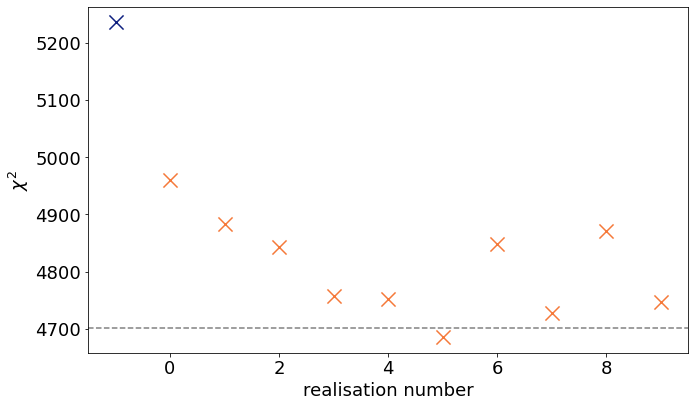

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.scatter(xvals[1:],chi2[1:],marker='x',color=mycolours['C0'],s=200)
ax.scatter(xvals[0],chi2[0],marker='x',color=mycolours['C3'],s=200)
ax.axhline(y=ndof[0],color='grey',ls='--',zorder=-10)

ax.set_xlabel('realisation number')
ax.set_ylabel(r'$\chi^2$')
plt.tight_layout()
plt.savefig('plots/chi2_realisations_{}_{}.pdf'.format(mocktype,fitname))

## Many mock types, many realisations